## Holdout Test Workbook
Welcome **Shell**. Again thank you for hosting this challenge.   
Please make sure to look over **POC_Dual_Model.ipynb** to have a frame of reference on our model before evaluating the holdout dataset.  

This notebook mainly utilizes standard python libraries and the functions store under **utils2.py**  
**To make it easy, make sure all files are in the same folder.**

Potentially, you might have to pip/conda install the following special packages:
- **xgboost**  
Please refer to POC_Dual_Model.ipynb to install xgboost. 

### Loading Libraries

In [1]:
#Standard python libraries
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#User Utils for Plotting and Scoring
from utils2 import plot_pred, metric_report,event_encoder,time_frame,feature_selection,add_outcome,return_outcome

### Importing Data

In [2]:
#Please input file name below by replacing ###.csv
holdout_df  = pd.read_csv('holdout.csv',parse_dates=['EventTime'],index_col='EventTime')

### Defining the Anomaly Events
  

In [3]:
#Example_Event = ['2018-02-08 04:19:00','2018-02-10 11:40:00']

Event_9 = ['2018-02-18 01:09:00','2018-02-21 12:42:00']
Event_10= ['2018-03-03 12:46:00','2018-03-08 17:58:00']

#Conversion of Events to datetime
Events_holdout = pd.to_datetime(Event_9+Event_10)
# Encoding the events into the dataset
holdout_df=event_encoder(Events_holdout,holdout_df)

--------------------------------------------------------------------------------------------------------
### *Now everything should be inputted. Just run rest of script to get the outcome from both models.*

## "Warning Model" 


In [4]:
X_holdout,y_holdout= feature_selection(holdout_df,n=25)

In [5]:
Warning_model = pickle.load(open("warning_model.pickle.dat", "rb"))

### Scoring and Validation
Per dataset, we will evaluate the model on both business needs and the correct metrics for a classifer. The metrics are as follows:  
- **ROC-AUC:** ability to rank between the two classes of Normal or Abnormal  
- **Balanced Accuracy:** accuracy score accounting for imabalanced classes that is defined as the average of recall obtained on each class  
- **Confusion Matrix:**  
    - Displays the # of True Positives, True Negatives, False Positives and False Negatives  
    - Format is as follows:  
    [[True Negative  False Positive]  
     [False Negative True Positive]]  
- **Classification Report:**  
    - Overall classification metric scorecard.  
    - Display precision, recall and f1-score.      
- **Prediction vs Actuals Graphs**
  - Plot of the model predictions represented as Normal = 0 and Abnormal = 1 over the dataset period compared to the Actual Values defined by the Event Times.
  - Orange = Model Predictions  
  - Blue = True Values (**Note: We just scaled the Actual values to 2 for better graphical visiblity**)    
- **Feature Importances**    
    - Bar chart explaining what variables are important to the model and the magnitude of their importance to the model as well.    
- **Times Detected**  
    - Shows beginning and end timestamps of each event.   
    - In addition, shows the time that the model predicts that the abnormal event is starting.

=============== holdout ===============
          ROC AUC score: 0.9928554793757911
Balanced Accuracy score: 0.9844304330752732

	Confusion Matrix
 [[35600   832]
 [  104 12423]]


	holdout Classification Report
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     36432
           1       0.94      0.99      0.96     12527

    accuracy                           0.98     48959
   macro avg       0.97      0.98      0.98     48959
weighted avg       0.98      0.98      0.98     48959




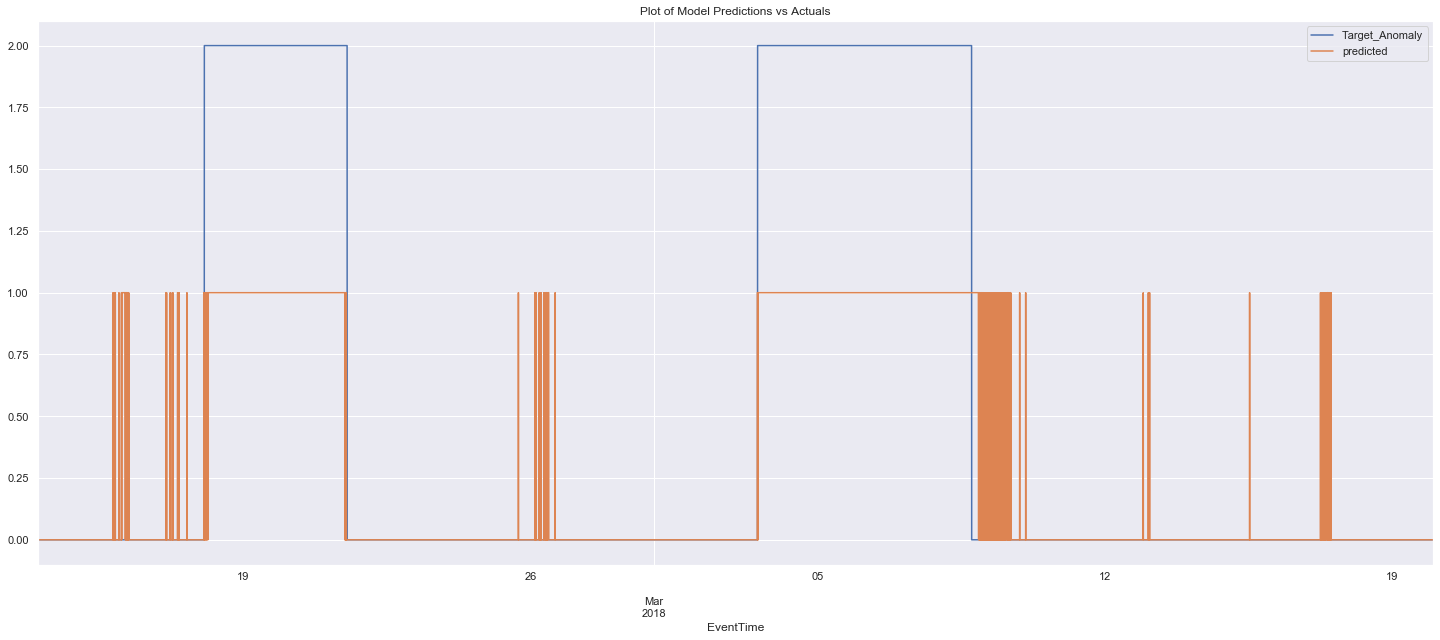

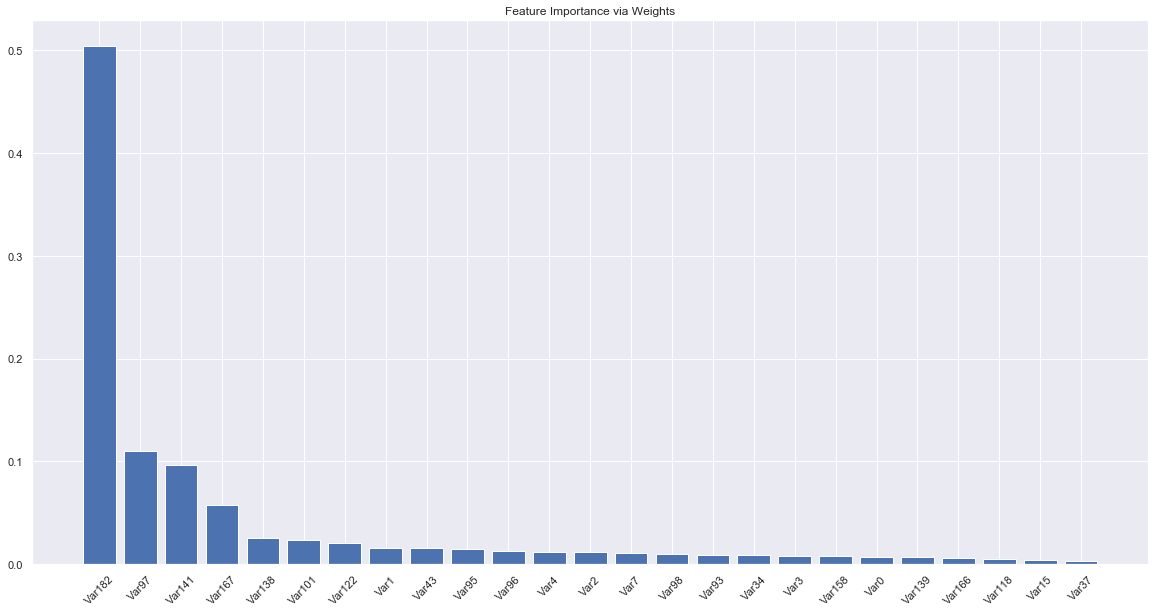

-------------------------- Event 9 --------------------------
 Predicted Start Anomaly Time: 2018-02-18 01:05:00.
   Predicted End Anomaly Time: 2018-02-21 12:14:00.
            Detected early by: 0 days 00:04:00

-------------------------- Event 10 --------------------------
 Predicted Start Anomaly Time: 2018-03-03 12:36:00.
   Predicted End Anomaly Time: 2018-03-08 17:57:00.
            Detected early by: 0 days 00:10:00



In [6]:
thresh_val=0.45
modelx = Warning_model

#Metric Reports
metric_report(modelx, X_holdout,y_holdout, thresh=thresh_val,name= "holdout")

#Plotting out the weights of the model to see importance 
Start = 0
End = 30
indices = np.argsort(np.abs(modelx.feature_importances_))[::-1]
plt.figure(figsize=(20,10))
plt.title("Feature Importance via Weights")
plt.bar(X_holdout.columns[indices][Start:End], np.abs(modelx.feature_importances_)[indices][Start:End])
plt.xticks(X_holdout.columns[indices][Start:End], rotation = 45)
plt.show()

#Finding Time Frame
#holdout Events
time_frame(modelx,X_holdout,Event_9,num=9,thresh=thresh_val)
time_frame(modelx,X_holdout,Event_10,num=10,thresh=thresh_val)

## "Critical Model"

In [7]:
X_holdout2,y_holdout2= feature_selection(holdout_df,n=25,Target_included=False)

In [8]:
Critical_model = pickle.load(open("Critical_model.pickle.dat", "rb"))

=============== holdout ===============
          ROC AUC score: 0.9928554793757911
Balanced Accuracy score: 0.9876963924370439

	Confusion Matrix
 [[36059   373]
 [  180 12347]]


	holdout Classification Report
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     36432
           1       0.97      0.99      0.98     12527

    accuracy                           0.99     48959
   macro avg       0.98      0.99      0.99     48959
weighted avg       0.99      0.99      0.99     48959




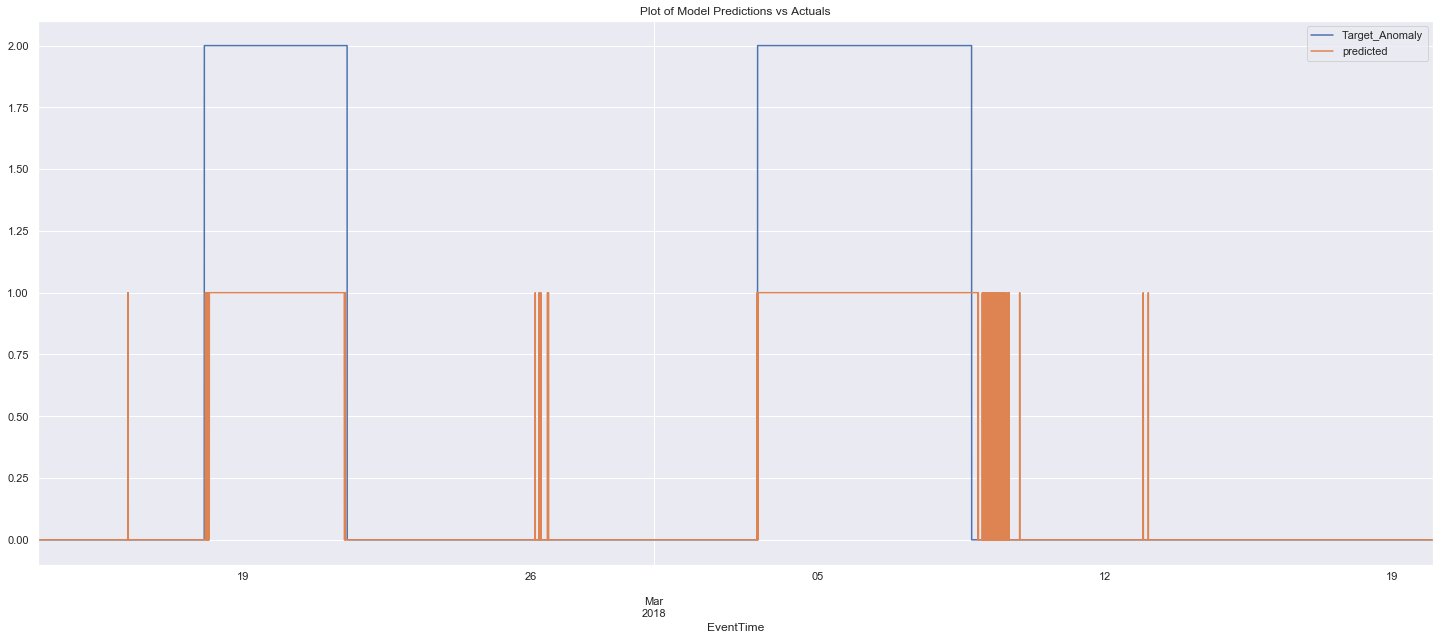

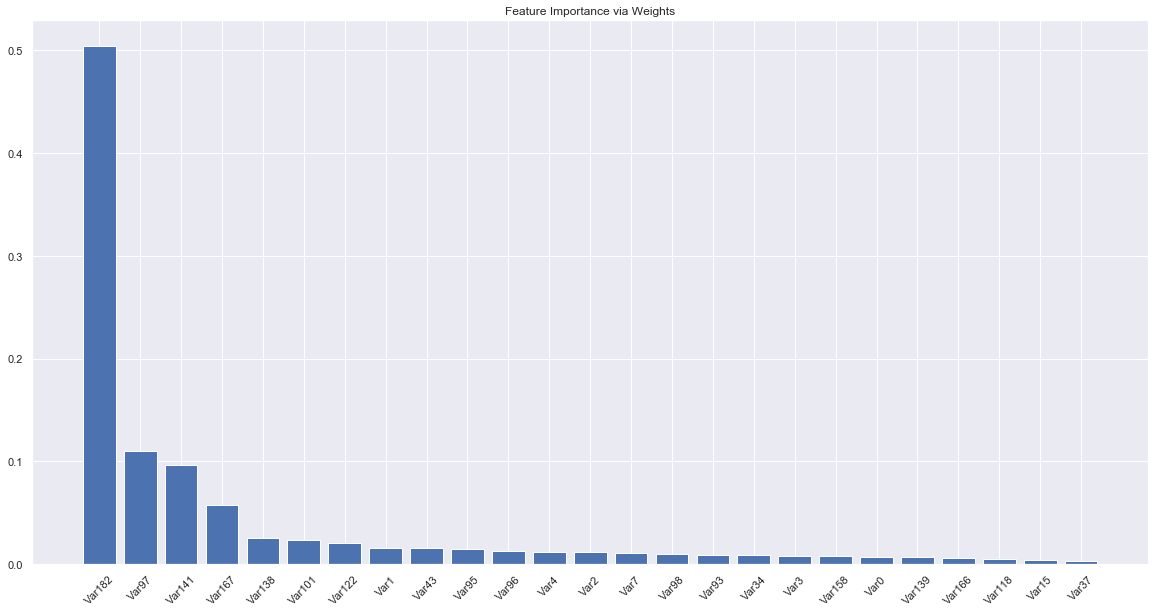

-------------------------- Event 9 --------------------------
 Predicted Start Anomaly Time: 2018-02-18 01:46:00.
   Predicted End Anomaly Time: 2018-02-21 11:43:00.
            Detected late by: 0 days 00:37:00

-------------------------- Event 10 --------------------------
 Predicted Start Anomaly Time: 2018-03-03 12:36:00.
   Predicted End Anomaly Time: 2018-03-08 17:57:00.
            Detected early by: 0 days 00:10:00



In [9]:
thresh_val=0.8
modelx = Critical_model

#Metric Reports
metric_report(modelx, X_holdout2,y_holdout2, thresh=thresh_val,name= "holdout")

#Plotting out the weights of the model to see importance 
Start = 0
End = 30
indices = np.argsort(np.abs(modelx.feature_importances_))[::-1]
plt.figure(figsize=(20,10))
plt.title("Feature Importance via Weights")
plt.bar(X_holdout2.columns[indices][Start:End], np.abs(modelx.feature_importances_)[indices][Start:End])
plt.xticks(X_holdout2.columns[indices][Start:End], rotation = 45)
plt.show()

#Finding Time Frame
#holdout Events
time_frame(modelx,X_holdout2,Event_9,num=9,thresh=thresh_val)
time_frame(modelx,X_holdout2,Event_10,num=10,thresh=thresh_val)

### Summary
As we can see from the results, our model still works at predicting and detecting the two anomaly events. 

- Again the classifer models have great **ROC AUC score = 0.99** and all other classification metrics are high as well.
- There is a reduction 

If you haven't yet, be sure to check out our **Tableau prototype** that would operational display how the the two models would notify the operator/user of the event. It is a m4v video file that displays an example implementation.

Have a great day!


In [10]:
X_holdout_warning =add_outcome(Warning_model,X_holdout,thresh=0.45)
X_holdout_critical=add_outcome(Critical_model,X_holdout2,thresh=0.8)
X_holdout_warning.rename(columns={'y_outcome':'y_warning'},inplace=True)
X_holdout_critical.rename(columns={'y_outcome':'y_critical'},inplace=True)
X_warning = X_holdout_warning['y_warning']
X_critical=X_holdout_critical['y_critical']
holdout_results = pd.merge(X_warning,X_critical,left_index=True,right_index=True)

In [11]:
print(holdout_results.shape)
print(holdout_results['y_warning'].value_counts())
print(holdout_results['y_critical'].value_counts())

(48959, 2)
0    35704
1    13255
Name: y_warning, dtype: int64
0    36239
1    12720
Name: y_critical, dtype: int64


In [13]:
Final_holdout_results=holdout_results['y_warning']

In [14]:
Final_holdout_results.to_csv('holdout_results.csv')